In [2]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Load data
df = pd.read_csv("2021q3_fin_sec_data.csv")

# One Hot encode name and cityba
df = pd.concat([df,pd.get_dummies(df['name'])], axis=1).drop(['name'],axis=1)
df = pd.concat([df,pd.get_dummies(df['cityba'])], axis=1).drop(['cityba'],axis=1)

In [4]:
# Extract y-column
afs = np.array(df.pop('afs'))
sic = np.array(df.pop('sic'))

In [5]:
# Convert to numpy
X = np.array(df)

# Standardized data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X

# Create imputer to replace missing values with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute data, then train
X_train_imp = imp.transform(X_train)

In [6]:
# cluster data
from sklearn.cluster import KMeans
num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters).fit(X_train_imp)
print('cluster centers:', kmeans.cluster_centers_)

cluster centers: [[ 5.69276854e-04 -3.13656799e-03 -5.05700753e-04 ...  2.42840314e-04
   4.20668223e-04  2.42840314e-04]
 [-1.01027598e-01 -1.86772740e-01 -4.53948402e-18 ... -1.15849114e-02
  -2.00683488e-02 -1.15849114e-02]
 [-1.00857571e-01 -1.85920755e-01 -1.22181398e-01 ... -1.15849114e-02
  -2.00683488e-02 -1.15849114e-02]
 ...
 [-1.00829117e-01 -1.86173416e-01 -4.53948402e-18 ... -1.15849114e-02
  -2.00683488e-02 -1.15849114e-02]
 [-1.00740950e-01 -1.82551740e-01 -1.20059392e-01 ... -1.15849114e-02
  -2.00683488e-02 -1.15849114e-02]
 [ 3.07276271e+00  2.72941458e+01  3.49456375e+00 ... -1.15849114e-02
  -2.00683488e-02 -1.15849114e-02]]


In [7]:
# let's see if the clusters correspond to afs or sic nicely
clusters_afs = [[] for i in range(num_clusters)]
for i in range(len(kmeans.labels_)):
  cluster_number = kmeans.labels_[i]
  clusters_afs[cluster_number - 1].append(afs[i])
# for i in range(len(clusters)):
#   print(clusters[i])
# print()
# print('-------------------------------------------')
clusters_sic = [[] for i in range(num_clusters)]
for i in range(len(kmeans.labels_)):
  cluster_number = kmeans.labels_[i]
  clusters_sic[cluster_number - 1].append(sic[i])
# for i in range(len(clusters)):
#   print(clusters[i])
# print()

In [17]:
clusters_inds = [[] for i in range(num_clusters)]
for i in range(len(kmeans.labels_)):
  cluster_number = kmeans.labels_[i]
  clusters_inds[cluster_number - 1].append(i)

In [18]:
small_clusters_inds = [c for c in clusters_inds if len(c) < 6]
small_clusters_inds

[[87, 5043],
 [3424],
 [928],
 [1712],
 [1028],
 [47, 48, 5369],
 [7395],
 [3680],
 [5618],
 [7255, 7256, 7257],
 [3153],
 [7081],
 [932],
 [5603],
 [2803],
 [666],
 [916],
 [1894, 4864],
 [3357],
 [5776],
 [6699],
 [3280],
 [1834],
 [256, 936, 5251],
 [3949],
 [3061],
 [5051],
 [4247],
 [7379],
 [4781],
 [644],
 [6516],
 [6615, 6751, 6819, 6878, 7218],
 [1895],
 [1206],
 [6459],
 [1033],
 [662],
 [1954],
 [3996],
 [2475],
 [1935],
 [5819],
 [1838],
 [1966],
 [2654],
 [6632],
 [259],
 [1145],
 [1403],
 [1635],
 [3208],
 [914],
 [5942, 7031],
 [6557],
 [4516],
 [867],
 [2670],
 [5751],
 [2390],
 [108],
 [4113],
 [2771],
 [2783],
 [50, 218, 4765],
 [3162],
 [7001],
 [4848],
 [7358],
 [1295],
 [7425],
 [3640],
 [3993],
 [2726],
 [5783],
 [1607],
 [4443],
 [212],
 [1327],
 [3122],
 [3900],
 [4118],
 [225, 226, 6002, 7124],
 [6793],
 [341, 6874],
 [1072],
 [5440],
 [6057],
 [817, 6659],
 [1071, 6954],
 [3358],
 [3787],
 [3489],
 [1479],
 [1097, 1098, 1099],
 [1373]]

In [19]:
df_clean = pd.read_csv("2021q3_fin_sec_data.csv")

In [23]:
outlier_companies = [[df_clean['name'][i] for i in c] for c in small_clusters_inds]
outlier_companies

[['b2digital, inc.', 'b2digital, inc.'],
 ['amphastar pharmaceuticals, inc.'],
 ['northrop grumman corp /de/'],
 ['federal realty investment trust'],
 ['cedar realty trust, inc.'],
 ['viveon health acquisition corp.',
  'viveon health acquisition corp.',
  'viveon health acquisition corp.'],
 ['elite performance holding corp'],
 ['american national group inc'],
 ['microbot medical inc.'],
 ['liaoning shuiyun qinghe rice industry co., ltd.',
  'liaoning shuiyun qinghe rice industry co., ltd.',
  'liaoning shuiyun qinghe rice industry co., ltd.'],
 ['blue ridge bankshares, inc.'],
 ['erytech pharma s.a.'],
 ['west bancorporation inc'],
 ['credex corp'],
 ['global ship lease, inc.'],
 ['ryanair holdings plc'],
 ['global cord blood corp'],
 ['right on brands, inc.', 'right on brands, inc.'],
 ['farmers & merchants bancorp'],
 ['zivo bioscience, inc.'],
 ['citi trends inc'],
 ['first merchants corp'],
 ['solaredge technologies, inc.'],
 ['origin materials, inc.',
  'origin materials, inc.',

In [8]:
for c in clusters_afs:
    mode = max(set(c), key=c.count)
    num_correct = 0
    for a in c:
        if a == mode:
            num_correct += 1
    print(num_correct, "out of", len(c))

3 out of 3
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
3 out of 3
1 out of 1
1 out of 1
1 out of 1
5 out of 5
6 out of 7
1 out of 1
3 out of 3
1 out of 1
8 out of 10
1 out of 1
2 out of 2
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
2 out of 2
1 out of 1
2 out of 2
1 out of 1
1 out of 1
4 out of 5
1 out of 1
1 out of 1
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
3 out of 3
2 out of 2
5 out of 5
5 out of 5
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
2 out of 2
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 1
1 out of 

In [13]:
sum([len(c) for c in clusters_afs])

7452

In [15]:
fib = [1, 1]
i = 2
while i < 100:
    fib.append(fib[-2] + fib[-1])
    i += 1
fib

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155,
 165580141,
 267914296,
 433494437,
 701408733,
 1134903170,
 1836311903,
 2971215073,
 4807526976,
 7778742049,
 12586269025,
 20365011074,
 32951280099,
 53316291173,
 86267571272,
 139583862445,
 225851433717,
 365435296162,
 591286729879,
 956722026041,
 1548008755920,
 2504730781961,
 4052739537881,
 6557470319842,
 10610209857723,
 17167680177565,
 27777890035288,
 44945570212853,
 72723460248141,
 117669030460994,
 190392490709135,
 308061521170129,
 498454011879264,
 806515533049393,
 1304969544928657,
 2111485077978050,
 3416454622906707,
 5527939700884757,
 8944394323791464,
 14472334024676221,
 23416728348467685,
 37889062373143906,
 61305790721611591,
 99194853094755497,
 160500643

In [16]:
elbow_results = []
for k in fib[1:11]:
    kmeans = KMeans(n_clusters=num_clusters).fit(X_train_imp)
    print('finished k=', k)
    # score = kmeans.score(X_train_imp)
    elbow_results.append(kmeans)
plt.plot([e.inertia_ for e in elbow_results])

KeyboardInterrupt: 

In [9]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [11]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=20)
gmm.fit(X_train_imp)

#predictions from gmm
labels = gmm.predict(X_train_imp)
labels

KeyboardInterrupt: 

In [27]:
sic

array([3231, 2090, 3674, ..., 2860, 2821, 3728])

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_imp)

In [45]:
from matplotlib import pyplot as plt
colors = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
]
plt.plot(X_reduced, color=[colors.index(i) for i in afs])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
PCA()

In [42]:
# Load data
df = pd.read_csv("2021q3_fin_sec_data.csv")
df_num = df.select_dtypes(include='number')
corr = df_num.corr()

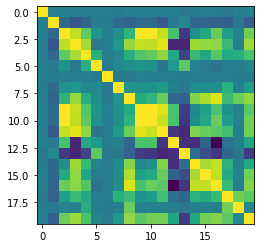

In [43]:
plt.imshow(corr)

In [39]:
import numpy as np
cov = np.cov(X_train_imp)

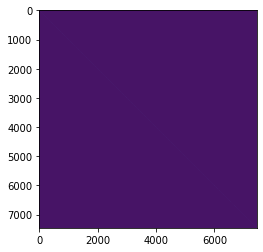

In [40]:
plt.imshow(cov)

Text(0.5, 1.0, 'Correlation Matrix')

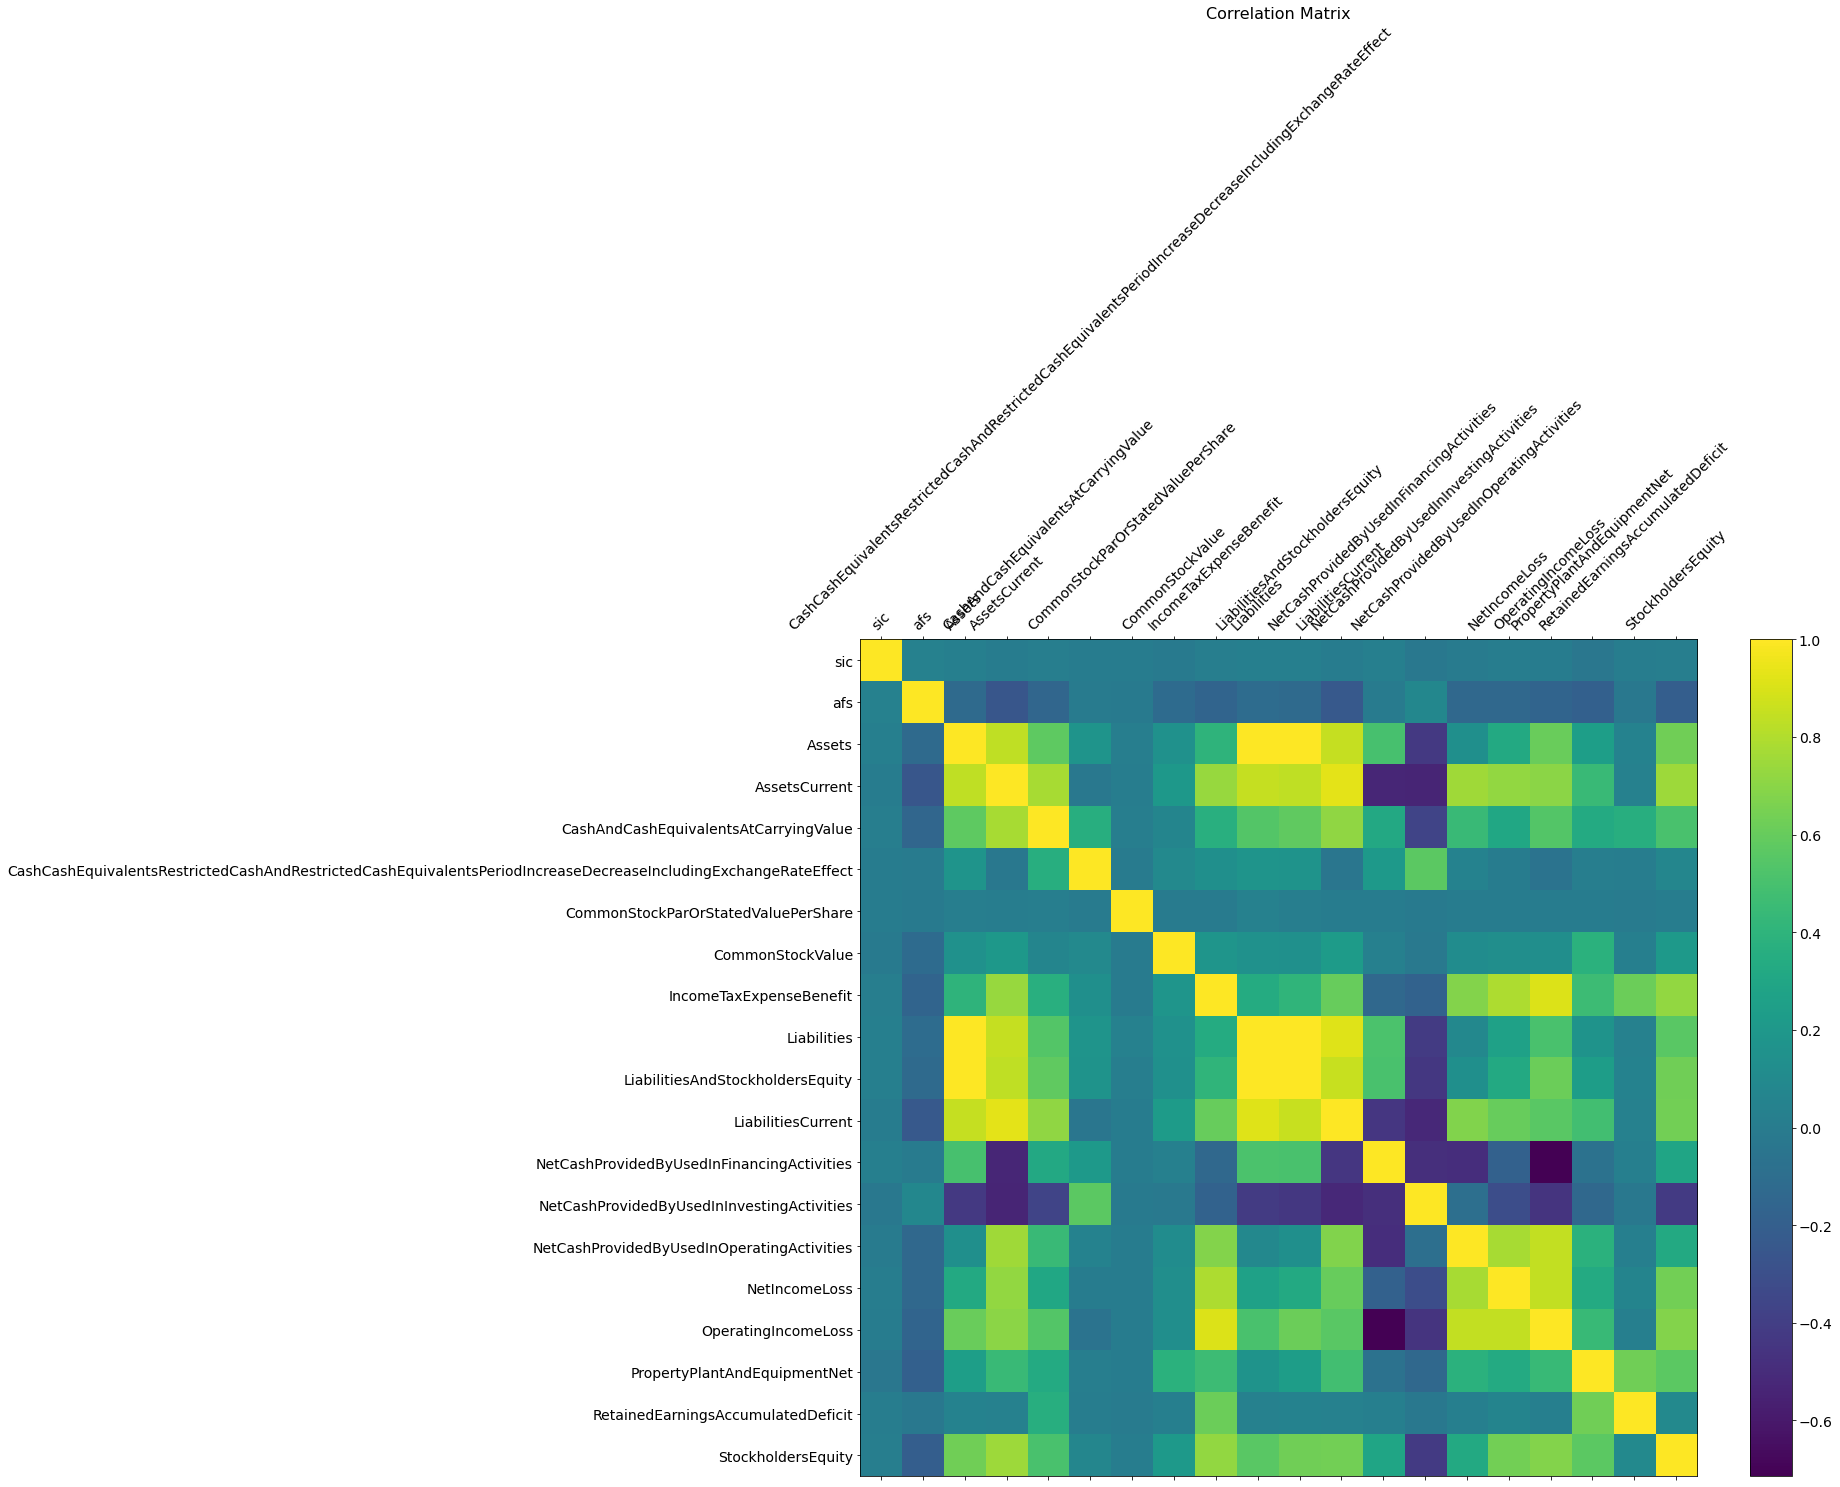

In [44]:
df = df_num
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)